# A simple Perceptron in NumPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(2,10),random_state=42)

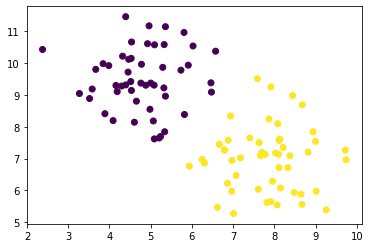

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

## Parameterize the classifier hyper-plane
* find offset $b$ and slope $w$

In [4]:
#helper function to find parameters
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


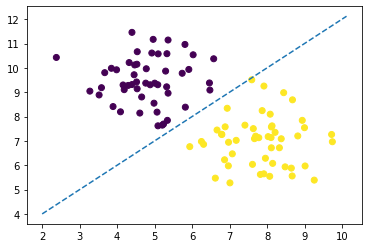

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
abline(1,2)

In [6]:
#set parameter
b=1
w=np.array([0.5,-0.5]) #norm=1 would be ~0.70... but 0.5 works fine

In [7]:
w.dot(np.array([0.5,-0.5]))#check if othorgonal

0.5

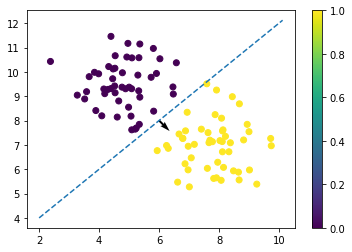

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
abline(1,2)
plt.quiver(6,8,w[0],w[1])# plot normal vector

### Classify samples via $sgn(wx+b)$

In [9]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1
  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1]


### classify single sample

In [10]:
w.dot(X[1,:].T)+b

1.5479664260276613

In [11]:
#or
X[1,:].dot(w)+b

1.5479664260276613

In [12]:
i=1
print (y[i],np.sign(w.dot(X[i,:].T)+b))
y[i]==np.sign(w.dot(X[i,:].T)+b)

1 1.0


True

### classify all samples at once
* change vector dot-product to vector matrix mult (matrix holds all samples)

In [13]:
w.dot(X.T)+b

array([-1.45145438,  1.54796643, -1.63234941,  0.99597542,  0.99350042,
       -1.89301723,  1.25809561,  0.72372863, -0.76899335, -1.56969932,
       -0.55855855,  1.57509478, -1.81071397, -2.06722039,  1.07720262,
        1.30274594,  0.33183588,  0.75665937,  2.13393134, -0.2650319 ,
        2.26325809,  1.28638768,  2.38355153,  1.80863943,  1.27237179,
       -0.89880771,  1.32421499, -1.57655385,  1.64582028,  0.04092883,
       -1.30470496, -1.68403564, -2.06804255, -0.45898422, -0.25136753,
        0.73154256,  1.4272736 , -1.6268376 , -1.45806503, -0.22042989,
       -1.0211476 ,  2.5555326 ,  0.65245869,  1.8063751 ,  1.78751585,
       -0.30661462, -2.1049316 , -1.28716425, -1.25976093,  0.60941328,
        0.81307574, -1.8860119 , -1.30354072,  1.43184325, -0.22707549,
        2.27475428, -1.74048047,  1.69933998,  1.49648976, -0.80131886,
       -1.11166954,  1.06461019, -1.82621057,  0.58721316,  2.52298078,
        1.01455056,  2.38914587, -1.80205946,  0.63728328,  1.48

In [14]:
np.sign(w.dot(X.T)+b)

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [15]:
#check result
y==np.sign(w.dot(X.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [16]:
y==np.sign(X.dot(w.T)+b)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [17]:
# get IDs of wrong classified
pos=np.where(y!=np.sign(w.dot(X.T)+b))
print(pos)

(array([], dtype=int64),)


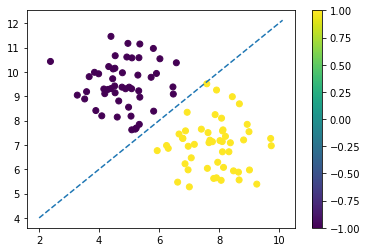

In [18]:
y_test=y
y_test[pos]=2
plt.scatter(X[:,0],X[:,1],c=y_test)#set color 
plt.colorbar()
abline(1,2)